# Pandas

The first of the computing libraries we will cover is pandas. Pandas is the most common package used in data analysis, with a focus on data manipulation and processing. We have already worked a bit with DataFrames, which is the core data type in pandas. In this notebook, we will cover some of the basic functionality of pandas. For more, check out the DLab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).

In [2]:
#pandas is frequently imported with the alias pd
import pandas as pd

For now, let's use an existing dataset, the penguins dataset! The dataframe  ([source](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download&select=penguins_size.csv)) is of body measurements of three penguin species (Adelie, Chinstrap, Gentoo). We will load in the file and use `df.head()` to look at the first few items.

The data has the following columns: 
- species (Adelie, Gentoo, Chinstrap)
- island 
- culmen_length (mm)
- culmen_depth (mm)
- flipper_length (mm)
- body_mass (g)
- sex (MALE / FEMALE)

The culmen is the top part of the penguin's bill!

In [10]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## DataFrame methods

There are many methods for summarizing DataFrames:
1. `df.describe()`: Summarize data frame columns
2. `df.value_counts()`: Calculate count per value of a row in a column
3. `df[column'].unique()`:  Unique values in a column
4. `df.isnull().sum()`: Identify number of Null values in a DataFrame
5. `df.dropna()`: Drop all rows with null values

In [39]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,body_mass_kg
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,4.201754
std,5.459584,1.974793,14.061714,801.954536,0.801955
min,32.100000,13.100000,172.000000,2700.000000,2.700000
25%,39.225000,15.600000,190.000000,3550.000000,3.550000
50%,44.450000,17.300000,197.000000,4050.000000,4.050000
75%,48.500000,18.700000,213.000000,4750.000000,4.750000
max,59.600000,21.500000,231.000000,6300.000000,6.300000


In [40]:
print(penguins['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [41]:
print(penguins.value_counts('species'))

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64


In [42]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
body_mass_kg          2
dtype: int64

In [56]:
penguins=penguins.dropna()

## Selecting columns/rows

We can use `.loc[row,column]` to index columns and rows in the DataFrame. A `:` indicates to use all columns/rows


In [43]:
#the first row, all columns
penguins.loc[0,:]


#select the species column
penguins.loc[:,'species']
#This is also equivalent to: 
penguins['species']

#select the body_mass for the third penguin
penguins.loc[2,'sex']


'FEMALE'

In [44]:
#We can also use boolean masks to subset our dataframe 
penguins.loc[penguins['sex']=='FEMALE',:]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.250
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3.450
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,3.625
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,3.200
...,...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE,4.650
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE,4.375
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,4.925
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4.850


## Challenge 1: Subsetting a DataFrame

1. Select all Adelie penguins and calculate the mean body mass (**Hint**:, use `.mean()`)
2. Do the same for Gentoo and Chinstrap penguins


In [46]:
## solution
penguins.loc[penguins['species']=='Adelie','body_mass_g'].mean()


3700.662251655629

# Modifying columns 

Sometimes, we want to modify a column. We can modify a numeric column as follows:



In [47]:
penguins['body_mass_kg'] = penguins['body_mass_g']/1000

penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3.45
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4.85
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,5.75
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,5.20


A column can also be converted to another type wholesale. For example, if you convert `body_mass_g` to a string column, then the same operation will fail.

In [53]:
penguins['body_mass_g']=penguins['body_mass_g'].astype(str)
penguins['body_mass_g']/1000

TypeError: unsupported operand type(s) for /: 'str' and 'int'

String operations can also be applied to columns, using the syntax `df.str.method()`

In [55]:
#make island name lower case:
penguins['island'].str.lower()

0      torgersen
1      torgersen
2      torgersen
3      torgersen
4      torgersen
         ...    
339       biscoe
340       biscoe
341       biscoe
342       biscoe
343       biscoe
Name: island, Length: 344, dtype: object

## Challenge 2: Modifying columns

1. Calculate the ratio between `culmen length` and `culmen depth` and save it to a new column `culmen ratio`
2. Convert the `sex` column to a number (0=female, 1=male) 


array([1])

## Plotting with pandas

Pandas also offers some basic plotting functions. In this section, we will cover three basic types of plot: histogram, scatter, and box plots. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for further information on plotting and plot customization.

### Histogram
A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`

The `bins` keyword argument changes the number of bins in the histogram. A few examples of the bins argument are below. Which plot would you pick? (A/B/C)

plot A


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

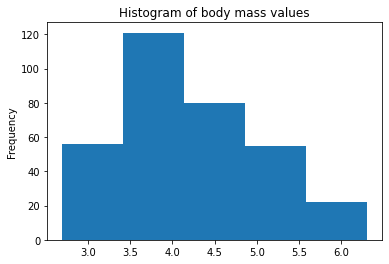

In [88]:
print('plot A')
penguins['body_mass_kg'].plot(kind='hist',title='Histogram of body mass values',bins=5)

plot B


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

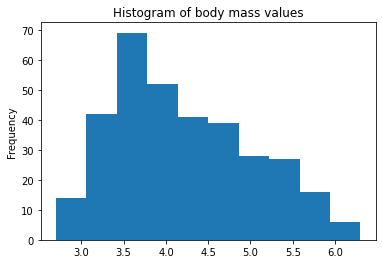

In [89]:
print('plot B')

penguins['body_mass_kg'].plot(kind='hist',title='Histogram of body mass values',bins=10)

plot C


<AxesSubplot:title={'center':'Histogram of body mass values'}, ylabel='Frequency'>

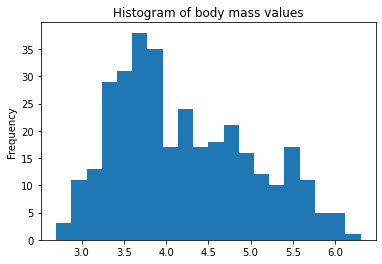

In [90]:
print('plot C')

penguins['body_mass_kg'].plot(kind='hist',title='Histogram of body mass values',bins=20)

### Scatterplot

We can also make a scatterplot by specifying the columns to use for the `x` and `y` axes.

<AxesSubplot:title={'center':'Correlation between culmen length and depth'}, xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

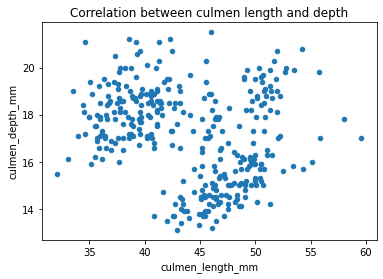

In [91]:
penguins.plot(kind='scatter', x= 'culmen_length_mm',y='culmen_depth_mm',title='Correlation between culmen length and depth')

### Barplot
Part of the process is also to gather the data in the right way before calling the plotting function. For example, if we want to make a bar plot with the number of observations for each species, we summarize those values first, then plot the result using a barplot.

<AxesSubplot:title={'center':'Count of each species'}, xlabel='species'>

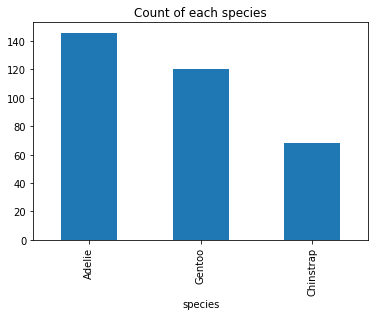

In [93]:
penguins.value_counts('species').plot(kind='bar',title='Count of each species')

## Challenge 2: Customizing a plot

Plots can be layered onto each other as well. To do this set the first layer equal to `ax`, then include the argument `ax=ax` in subsequent layers. Let's plot the scatterplot above, but including different colors for different species. To do this 

1. Make three different subdataframes, one for each species, using `.loc[]` and a boolean comparison
2. Plot the first layer (and set it equal to `ax`
3. Plot subsequent layers. Use a different color for each species (look at the documentation for the name of the color parameter). Some possible colors to use are: 'green','red','purple','black',etc. 
4. Add a title and any other modifications to the plot (better x and y labels, for example)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

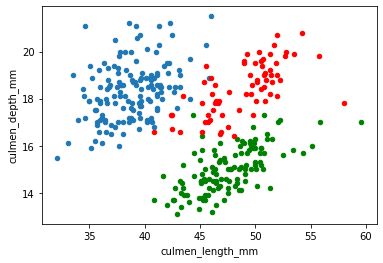

In [118]:
#starter code
## subset data 
#chinstrap = 
#adelie = 
#gentoo = 
#ax = #first layer here
##plot other layers



# Solution
adelie = penguins.loc[penguins['species']=='Adelie',:]
chinstrap = penguins.loc[penguins['species']=='Chinstrap',:]
gentoo = penguins.loc[penguins['species']=='Gentoo',:]


ax = adelie.plot(kind='scatter', x= 'culmen_length_mm',y='culmen_depth_mm')
gentoo.plot(kind='scatter', x= 'culmen_length_mm',y='culmen_depth_mm',color = 'green',ax = ax)
chinstrap.plot(kind='scatter', x= 'culmen_length_mm',y='culmen_depth_mm', color = 'red', ax = ax)


For more on data visualization, check out the [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization)